In [1]:
import numpy as np
import math as math
import time as time
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def calculate_Q(data):
    Q=np.zeros((data.shape[0],data.shape[0]))
    for i in range (0,data.shape[0]):
        for j in range(0,data.shape[0]):
            Q[i,j]=np.dot(data[i,1:],np.transpose(data[j,1:]))*data[i,0]*data[j,0]
    return Q

In [3]:
def find_j(gradient,alpha,data,Ilow,i,Q):
    temp=[]
    min_value = 1e30
    min_idx = 0
    for z in Ilow:
        if -data[z,0]*gradient[z]<-data[i,0]*gradient[i]:
            b=-data[z,0]*gradient[z]+data[i,0]*gradient[i]
            a= Q[i,i]+Q[z,z] - 2*Q[i,z]/(data[z,0]*data[i,0])
            a = max(a, 1e-12)
            val = -(b**2) / a
            if val < min_value:
                min_value = val
                min_idx = z
    return min_idx 

In [4]:
def I(alpha,C):
    Iup=[]
    Ilow=[]
    for i in range(0,alpha.shape[0]):
        if ((alpha[i]<C) and (data[i,0]==1)) or ((alpha[i]>0) and (data[i,0]==-1)):
            Iup.append(i)
        elif((alpha[i]<C) and (data[i,0]==-1)) or ((alpha[i]>0) and (data[i,0]==1)):
            Ilow.append(i)
    return Iup,Ilow

In [5]:
def cost_function(Q,alpha,e):
    cost=0.5*np.dot(np.transpose(alpha),np.dot(Q,alpha))-np.dot(np.transpose(e),alpha)
    return cost

In [6]:
def WSS(alpha,Q,epsilon,C,e,data):
        Iup,Ilow=I(alpha,C)
        gradient=np.dot(Q,alpha)-e
        i=Iup[np.argmax(-gradient[Iup,0]*data[Iup,0])]
        j=find_j(gradient,alpha,data,Ilow,i,Q)
        return i,j,gradient

In [7]:
def alpha_update(data,i,j,C,alpha,gradient):
    diff=alpha[i]-alpha[j]
    alpha_sum=alpha[i]+alpha[j]
    a= Q[i,i]+Q[j,j] - 2*Q[i,j]/(data[j,0]*data[i,0])
    a = max(a, 1e-12)
    if data[i,0]!=data[j,0]:
        alpha[i]=alpha[i]+(-gradient[i]-gradient[j])/a
        alpha[j]=alpha[j]+(-gradient[i]-gradient[j])/a
    elif data[i,0]==data[j,0]:
        alpha[i]=alpha[i]+(-gradient[i]+gradient[j])/a
        alpha[j]=alpha[j]+(gradient[i]-gradient[j])/a

    if data[i,0]!=data[j,0]:
        if diff>0: 
            if alpha[i] > C:
                alpha[i]=C
                alpha[j]=C-diff
        else:
            if(alpha[j] > C):
                alpha[j]=C
                alpha[i]=C+diff
        if diff>0:
            if alpha[j] < 0:
                alpha[j]=0
                alpha[i]=diff
        else:
            if alpha[i]<0:
                alpha[i]=0
                alpha[j]=-diff
    
    if data[i,0]==data[j,0]:
            if alpha_sum >C: 
                if (alpha[i] > C):
                    alpha[i]=C
                    alpha[j]=alpha_sum-C
            else:
                if(alpha[j] > C):
                    alpha[j]=C
                    alpha[i]=alpha_sum-C
            if alpha_sum<C:
                if alpha[j] < 0:
                    alpha[j]=0
                    alpha[i]=alpha_sum
            else:
                if alpha[i]<0:
                    alpha[i]=0
                    alpha[j]=alpha_sum
    return alpha

In [8]:
def mySmoSVM(Q,data,alpha,e,epsilon,l,C):
    cost_diff=1
    cost=[]
    ite=0
    c=float(cost_function(Q,alpha,e))
    cost.append(c)
    while cost_diff>epsilon and ite<=1000:
        i,j,gradient=WSS(alpha,Q,epsilon,C,e,data)
        c_prev=c
        alpha=alpha_update(data,i,j,C,alpha,gradient)
        c=float(cost_function(Q,alpha,e))
        cost.append(c)
        cost_diff=abs(c_prev-c)
        ite=ite+1
    return cost

In [9]:
num=0
t=[]
cost=[]
while num<5:
    num=num+1
    start_time = time.time()
    data=np.loadtxt("MNIST-13.csv",delimiter=",")
    data[data[:,0]==1,0]=1
    data[data[:,0]==3,0]=-1
    norms=np.linalg.norm(data[:,1:],axis=1)
    data[:,1:]=data[:,1:]/norms.reshape((norms.shape[0],1))
    alpha=np.zeros((data.shape[0],1))
    e=np.ones((data.shape[0],1))
    Q=calculate_Q(data)
    epsilon=0.0001
    l=1
    C=1
    cost.append(mySmoSVM(Q,data,alpha,e,epsilon,l,C))
    t.append(time.time() - start_time)

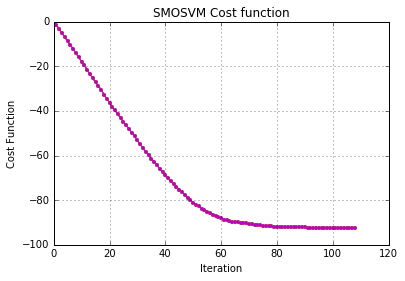

In [10]:
plt.figure()
plt.title("SMOSVM Cost function")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.grid()
plt.plot(range(len(cost[0])), cost[0], '.-', color="g")
plt.plot(range(len(cost[1])), cost[1], '.-', color="b")
plt.plot(range(len(cost[2])), cost[2], '.-', color="r")
plt.plot(range(len(cost[3])), cost[3], '.-', color="y")
plt.plot(range(len(cost[4])), cost[4], '.-', color="m")
plt.savefig('SMOSVM.png')
plt.show()

In [11]:
print "mean" 
print np.mean(t)
print "------------------"
print "std deveation"
print np.std(t)

mean
15.575
------------------
std deveation
0.286965480757
